# **TÉCNICAS DE MONTECARLO**

Máster en Tratamiento Estadístico-Computacional de la Información - 2023/2024

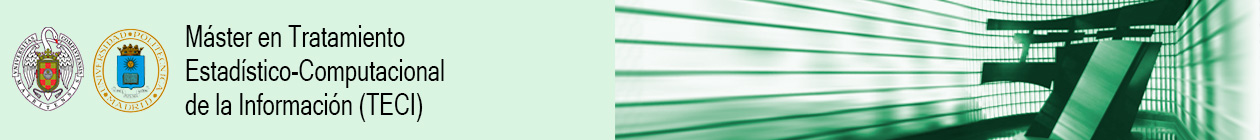

Andrés Herencia López-Menchero

## **Generación de números aleatorios**

### **Números aleatorios y seudoaleatorios**

#### Números aleatorios

Los números aleatorios se generan a partir de valores asociados a distribuciones uniformes estandar $\text{U}(0,1)$.

Es necesario contrastar que los valores generados son uniformes e independientes
dado que los generadores de números aleatorios son programas determinísticos que
intentan reproducir una sucesión de valores que parezca aleatoria.

Una secuencia de números aleatorios es una secuencia de números tal que cualquier secuencia finita seleccionada previamente a su diseño es igualmente factible que esté en ella.

#### Números seudoaleatorios

La generación de números aleatorios mediante ordenadores presenta ciertas dificultades respecto a la noción de azar. Por ello, a los valores de los números aleatorios obtenidos mediante ordenadores se les denomina
números pseudo-aleatorios.

Los números seudoaleatorios deben presentar las siguientes propiedades:

- Deben contrastar la **prueba de uniformidad y de independencia** (es decir, las secuencias generadas responden a una distribución uniforme y son estadísticamente independientes)

- **La cadena debe ser reproducible**. Si el primer número que genero es un 7 y luego a partir de él, obtengo 2,4,1,5…, cada vez que empiece generando un 7, debe seguir la misma secuencia.

- Los números deben generarse a **gran velocidad**.

- Debe ocupar **poca memoria** en el ordenador.

- El **ciclo de repetición** debe ser lo más **largo** posible.

#### Métodos de generación de Números seudoaleatorios

##### Método de los cuadrados Medios (Von Neumann)

Este método se debe fue propuesto en los años 40 por los matemáticos John von
Neumann y Nicholas Metropolis.

El método comienza tomando un número al azar, la semilla $x_0$, de $2n$ cifras (originalmente los autores proponían 4 cifras) que al elevarlo al cuadrado resulta un número de hasta $4n$ cifras. Si es necesario se añaden ceros a la izquierda para que el número resultante tenga exactamente $4n$ cifras.

Sea $x_1$ el número resultante de seleccionar las $2n$ cifras centrales de $x^2_0$; el primer número aleatorio $u_1$ se obtiene poniendo un punto decimal delante las $2n$ cifras de $x_1$. A continuación $x_2$ y $u_2$ se generan a partir de $x_1$ del mismo modo.

Así sucesivamente, el proceso se repite para generar una secuencia de números pseudoaleatorios.

Es importante tener en cuenta que, aunque el Método de los Cuadrados Medios es simple, no es el más eficiente ni el más seguro en términos de calidad de los números generados. Además, la elección de la semilla inicial es crucial, ya que puede afectar la calidad de la secuencia generada.

In [1]:
import time
import pandas as pd

def rand_von_neumann(seed=int(time.time()), n2=4, N=10):
    """
    Generates a sequence of pseudo-random numbers using the Von Neumann method.

    Parameters:
    - seed (int): Initial seed for pseudo-random number generation. By default,
    the current time is used.
    - n2 (int): Number of central digits to consider in each iteration. Default
    is 4.
    - N (int): Total number of iterations to generate the sequence. Default is
    10.

    Returns:
    - pandas.DataFrame: A DataFrame containing the generated sequence with
    columns 'i', 'X' (current number), and 'X^2' (pseudo-random number).

    Raises:
    - Exception: If the seed is not a natural number.
    """

    if type(seed)!=int or int(seed)%1 != 0:
        raise Exception("The seed value must be a natural number.")
        seed = int(seed) % (10 ** n2)

    aux1 = 10 ** (2 * n2 - n2 / 2)
    aux2 = 10 ** (n2 / 2)

    X = seed
    X2 = X ** 2

    data = pd.DataFrame({"i": [0], "X": [X], "X^2": [X2]})
    for i in range(1,N):
        X = int((X2 - (X2 // aux1) * aux1) // aux2)
        X2 = X ** 2
        data.loc[len(data.index)] = [i, X, X2]

    data = data.set_index('i')
    return data

In [2]:
rand_von_neumann(seed=4122)

,X,X^2
i,,
0,4122,16990884
1,9908,98168464
2,1684,2835856
3,8358,69856164
4,8561,73290721
5,2907,8450649
6,4506,20304036
7,3040,9241600
8,2416,5837056


Es importante tener en cuenta que, aunque el Método de los Cuadrados Medios es simple, no es el más eficiente ni el más seguro en términos de calidad de los números generados. Además, ***el método no es muy efectivo ya que la longitud del ciclo de repetición no se puede controlar y puede generar ciclos muy cortos***, como en este caso:

In [3]:
rand_von_neumann(seed=3708)

,X,X^2
i,,
0,3708,13749264
1,7492,56130064
2,1300,1690000
3,6900,47610000
4,6100,37210000
5,2100,4410000
6,4100,16810000
7,8100,65610000
8,6100,37210000


##### Métodos de congruencias lineales

Los principales generadores de números pseudo-aleatorios utilizados hoy en día son los llamados generadores congruenciales lineales, introducidos por Lehmer en 1951.

###### Método de Lehmer

Un método congruencial comienza con un valor inicial (semilla) $x_0$, y los sucesivos valores $x_n, n \ge 1$ se obtienen recursivamente con la siguiente fórmula:

$$ x_n = a\cdot x_{n−1} + b \text{ mod } m $$

donde $a$, $m$ y $b$ son enteros positivos que se denominan, respectivamente, el multiplicador, el módulo y el incremento. Si $b = 0$, el generador se denomina multiplicativo; en caso contrario se llama mixto. La sucesión de números pseudo-aleatorios $u_n, n ≥ 1$ se obtiene haciendo $u_i =\frac{x_i}{m}.$

**Explicación del método:**

From `i = 1` to `longitud_secuencia`:
- Multiplicar `X_{i-1}` por otro número de `k` cifras: `mu` (parámetro del método)
- Considerar el número `Y` formado por las `k` cifras de la izquierda de
`mu * X_{i-1}`, y el número `Z` formado por las cifras restantes.
- Obtener `X_i = Z - Y`.

In [4]:
import time
import pandas as pd

def rand_lehmer(seed=int(time.time()), n=4, mu=76, k=2, N=10):
    """
    Generates a sequence of pseudo-random numbers using the Lehmer method.

    Parameters:
    - seed (int): Initial seed for pseudo-random number generation. By default,
    the current time is used.
    - n (int): Number of digits in the random number.
    - mu (int): Parameter for the Lehmer method.
    - k (int): Number of digits of mu.
    - N (int): Total number of iterations to generate the sequence. Default
    is 10.

    Returns:
    - pandas.DataFrame: A DataFrame containing the generated sequence with
    columns 'i', 'X' (current number), 'X * mu' (product of current number and
    mu), 'Y', and 'Z'.

    Raises:
    - Exception if the seed is not a natural number.
    """
    if type(seed)!=int or int(seed)%1 != 0:
        raise Exception('The seed is not a natural number.')

    aux = 10 ** n
    seed = float(seed) % 10 ** n
    mu = mu % 10 ** k

    X = int(seed)
    Xmu = X * mu
    Y = Xmu // aux
    Z = Xmu % aux

    data = pd.DataFrame({"i": [0], "X": [X], "X * mu": [Xmu],
                         "Y": [Y], "Z": [Z]})

    for i in range(1, N + 1):
        X = Z - Y
        Xmu = X * mu
        Y = Xmu // aux
        Z = Xmu % aux
        data.loc[len(data.index)] = [i, X, Xmu, Y, Z]

    data = data.set_index('i')
    return data

In [5]:
rand_lehmer(seed=4122)

,X,X * mu,Y,Z
i,,,,
0,4122,313272,31,3272
1,3241,246316,24,6316
2,6292,478192,47,8192
3,8145,619020,61,9020
4,8959,680884,68,884
5,816,62016,6,2016
6,2010,152760,15,2760
7,2745,208620,20,8620
8,8600,653600,65,3600


***¡Cuidado! El método no es muy efectivo porque acaba degenerando en 0 para secuencias de números largas.***

###### Método general de congruencias lineales

A partir de 1951 se han desarrollado varios métodos que aprovechan las propiedades de la congruencia lineal. Estos métodos son más eficientes y con una buena elección de los parámetros $a$, $b$ y $m$ permiten crear secuencias de números seudoaleatorios con muy buenas propiedades estadísticas.

El código general para implementar un generador de congruencias lineales es el siguiente:

In [6]:
import time
import pandas as pd

def rand_linear_congr(seed=int(time.time()), a=5, b=3, m=16, N=10):
    if type(seed)!=int or int(seed)%1 != 0:
        raise Exception('The seed is not a natural number.')

    X = int(seed)
    Y = a * X + b

    data = pd.DataFrame({"i": [0], "X": [X], "Y": [Y]})

    for i in range(1, N + 1):
        X = Y % m
        Y = a * X + b
        data.loc[len(data.index)] = [i, X, Y]

    data = pd.DataFrame(data)
    data = data.set_index('i')

    return data

In [7]:
rand_linear_congr()

,X,Y
i,,
0,1700334470,8501672353
1,1,8
2,8,43
3,11,58
4,10,53
5,5,28
6,12,63
7,15,78
8,14,73


**Generador de IBM antiguo (generador multiplicativo, $b=0$, más rapido)**

In [8]:
rand_linear_congr(a = 630360016, b = 0, m = 2**31 - 1)

,X,Y
i,,
0,1700334470,1071822863714551520
1,1536739662,968699237926154592
2,766162694,482958328048443104
3,1846312692,1163841698070123072
4,1284467191,809676759070235056
5,230585122,145351641193281952
6,820069048,516938738218384768
7,880693142,555153743082210272
8,1670209190,1052833091731747040


**Generador de Caveyou & MacPherson (generador mixto)**

In [9]:
rand_linear_congr(a = 5^15, b = 1, m = 2**35)

,X,Y
i,,
0,1700334470,17003344701
1,17003344701,170033447011
2,32594493539,325944935391
3,16707290079,167072900791
4,29633947319,296339473191
5,21461566247,214615662471
6,8457232263,84572322631
7,15852845895,158528458951
8,21089505479,210895054791


**Generador de Kobayashi (generador mixto)**

In [10]:
rand_linear_congr(a = 314159269, b=453806245, m=2**31)

,X,Y
i,,
0,1700334470,534175834604508675
1,1697846787,533394305931724948
2,306628756,96330266293145609
3,1736806409,545633832299761266
4,1604947570,504209155828332575
5,1235597343,388174358509028512
6,1037599904,325971627808916421
7,1785201605,560837631698232990
8,1175152286,369184983587245179


#### **Conclusiones**

- En los modelos de simulación es habitual que los eventos (llegadas, salidas, etc.) respondan a una distribución determinada (exponencial, normal, etc.).
- Para poner a funcionar dichos modelos, surge la necesidad de generar valores de dichas distribuciones.
- Veremos que los valores de dichas distribuciones se pueden generar a partir de la generación de valores de una distribución Uniforme ($\text{U}(0,1)$).
- Para generar valores de una U(0,1), generaremos valores de una distribución Uniforme Discreta $\text{U}(0,m-1)$ (que toma valores enteros entre $0$ y $m-1$) y dividiremos el resultado por $m-1$ (parece más “razonable” generar directamente valores de enteros que valores decimales entre 0 y 1).
- Para generar valores enteros entre $0$ y $m-1$ se utilizan varios tipos de generadores siendo el congruencial uno de los más conocidos y eficientes: la idea básica es generar números tomando el resto de dividir por $m$ (que será siempre un valor ente $0$ y $m-1$).
- Para favorecer la velocidad de cómputo por un ordenador de $k$ bits, se aprovecha su incapacidad para generar números enteros más allá de $2^k - 1$ (integer overflow) permitiendo evitar la necesidad de dividir.
- Idealmente se busca que el generador genere ciclos completos, i.e., de longitud $m$ (todos los posibles restos) dado que si no, los valores se repetirán y podrían estar concentrados (no uniformes). Hay 2 tipos de generadores congruenciales:
 - el multiplicativo: tipo $a \times X$ (más rápido)
 - el mixto: tipo $a \times X + b$ (precisa de una operación adicional de aditividad.
- Se suele utilizar el multiplicativo aún cuando solo permite obtener ciclos de repetición de tamaño $m-1$ para valores concretos de $a$ y $m$, pero no para $m=2^k$.
- La elección para $m$ del valor $2^k$ no es mala, pero los ciclos de repetición son como máximo de longitud $m/4$.
- Es conocido en los ordenadores de 32 bits el valor $2^{31} - 1$ (31 bits para el número y 1 para el signo). Dicho número es el mayor primo (de Mersenne) menor que 2^{31}.


### **Tests para la comprobación de la uniformidad y la aleatoriedad**


La pregunta que nos hacemos es si los valores obtenidos con un generador de uniformes se
pueden considerar realmente uniformes y también independientes (respondiendo a la noción de
azar): ¿se pueden considerar aleatorios los números pseudoaleatorios generados?

El objetivo de los test de uniformidad es verificar si los números generados se pueden considerar como una realización de una muestra aleatoria simple de una distribución $\text{U}(0,1)$. Los más populares son:

1. Test de Kolmogorov - Smirnov.
2. Test de la Chi Cuadrado $\chi^2$.

El objetivo de los test de aleatoriedad es verificar si los números generados se pueden considerar aleatorios en el sentido de haber sido generados de forma independiente. Son populares los de Test de Rachas.


#### Tests de uniformidad

##### **Test de Kolgomorov-Smirnov**

El *test de Kolmogorov - Smirnov* es un test de bondad de ajuste que se utiliza para determinar si los datos de una determinada muestra se ajustan a una hipotética distribución. Consiste en comparar la función de distribución observada con aquella teórica a la que debería responder y calcular el máximo de las diferencias entre ambas.

Sea
- $u_1, u_2, \dots, u_n$ una muestra aleatoria observada.
- $u_{(1)} \le u_{(2)} \le \dots \le u_{(n)}$ la muestra ordenada.

Entonces, si fueran $\text{U}(0,1)$, deberían teóricamente cubrir el intervalo $[0,1]$, e idealmente, estar equi-espaciados, con lo que cada punto $u_{(i)}$ dejaría a su izquierda una probabilidad acumulada de $\frac{i}{n}$.

Se trata entonces de comparar dichos valores teóricos $\frac{i}{n}$ con los observados $u_{(i)}$.

El estadístico del test es

$$D_n = \left\lbrace\max_{1\le i \le n} \left\lbrace D^+_n = \max{\left|\frac{i}{n} - u_{(i)}\right|, \quad D^-_n = \max{\left|\frac{i-1}{n} - u_{(i)}\right|}}\right\rbrace \right\rbrace$$

La región crítica del contraste es $[D_{n,\alpha},+\infty)$ , donde $D_{n,\alpha}$ es el percentil de orden $1-\alpha$ de la
distribución de $D_n$, máxima diferencia entre la $F.D.$ observada y la teórica.

**Implementación**


In [11]:
import numpy as np
from scipy.stats import ksone

def kolmogorov_smirnov_test(data, alpha = 0.05):
    """
    Perform the Kolmogorov-Smirnov (KS) test on a given dataset.

    Parameters:
    - data: List or array of the sample data.
    - alpha: Significance level (default is 0.05).

    Returns:
    - D: Kolmogorov-Smirnov statistic.
    - D_critical: Critical value for the given significance level.
    - CR: Critical region for the test.
    - p_value: p-value for the KS test.
    """
    n = len(data)
    data =  sorted(data)
    D_plus = 0; D_minus = 0
    dist = []

    for i in range(n):
        D_plus = abs((i+1)/n - data[i])
        D_minus = abs(i/n - data[i])
        dist.append(max(D_plus, D_minus))

    # outputs
    D = max(dist)
    CR = [ksone.ppf(1-alpha/2,n),np.infty]
    D_critical = ksone.ppf(1-alpha/2,n) # tabulate this function is complicated
    p_value = 1 - ksone.sf(D * np.sqrt(n), n)

    return D, D_critical, CR, p_value

Conjunto de datos de prueba:

In [12]:
data = [0.36, 0.16, 0.61, 0.52, 0.17, 0.88, 0.90, 0.66, 0.04, 0.93,
        0.37, 0.21, 0.10, 0.28, 0.62, 0.68, 0.78, 0.94, 0.53, 0.46]

In [14]:
kolmogorov_smirnov_test(data)

(0.07999999999999996,
 0.2940755433823519,
 [0.2940755433823519, inf],
 0.9957554058175793)

Con un p-valor tan alto, no podemos rechazar la hipótesis nula de uniformidad, i.e., la muestra es uniforme.

##### **Test de la $\chi^2$**

El test de la Chi-Cuadrado (Pearson, 1900) es un test de bondad de ajuste que, a diferencia del de K-S, precisa
de bastantes datos dado que es un test asintótico.

En esta ocasión, el estadístico a construir plantea las diferencias entre las frecuencias observadas y las que se
esperarían bajo la hipotética distribución $F_0$, en lugar de las esperadas bajo hipótesis de independencia entre ellas.

**Implementación**:

1. Dividir el intervalo $(0,1)$ en $k$ clases disjuntas: $I_1, I_2, \dots, I_k | I_i \cap I_j = \emptyset$. Sea $Z_j$ la amplitud de la clase $j$.

2. Contar el número de observaciones muestrales que caen en cada clase $j$: $O_j$.

3. Comparar las frecuencias observadas en cada clases con las que se corresponderían según la distribución teórica (las esperadas para dicha distribución: $E_j \equiv n Z_j$). A tal fin, utilizar el estadístico:

$$\chi ^2 = \sum_{j=1} ^k \frac{(O_j - E_j)^2}{E_j} = \sum_{j=1} ^k \frac{(O_j - n Z_j)^2}{n Z_j} \rightarrow_{n\to \infty} \chi_{k-1}^2$$

4. La región crítica del contraste es $[\chi_{k-1,\alpha}^2,\infty)$.

**NOTA**: *El valor de $\chi^2$ varía según los intervalos elegidos.*
*No hay normas pero un convenio es: igual amplitud, al menos 3 intervalos y frecuencia esperada $\ge$ 5.*

**Implementación:**

In [15]:
import numpy as np
from scipy.stats import chi2

def chi_squared_test(data, n_intervals = 5, alpha = 0.05):
    """
    Perform a chi-squared goodness-of-fit test on a given dataset.

    Parameters:
    - data: List or array of the observed values.
    - n_intervals: Number of intervals for expected frequencies (default is 5).
    - alpha: Significance level for the test (default is 0.05).

    Returns:
    - chi_sq: Chi-squared statistic.
    - CR: Critical region for the test.
    - chi_2_critical: Critical value for the given significance level.
    - p_value: p-value for the chi-squared test.

    Notes:
    - The function divides the range of the data into 'n_intervals' intervals
    and calculates observed frequencies.
    - Conducts a chi-squared test to assess if the observed frequencies differ
    significantly from expected frequencies.
    """

    n = len(data)
    data = sorted(data)
    exp_freq = np.linspace(0, 1, num=n_intervals+1)
    obs_freq = [[i for i in data if exp_freq[k] <= i < exp_freq[k+1]] \
                for k in range(n_intervals)]
    chi_sq = 0
    for j in range(n_intervals):
        chi_sq += (len((obs_freq[j]))-n*(exp_freq[1]))**2/(n*(exp_freq[1]))

    # outputs
    CR = [chi2.ppf(1 - alpha, n_intervals-1),np.infty]
    chi_2_critical = CR[0]
    p_value = chi2.sf(chi_sq * np.sqrt(n_intervals), n_intervals)

    return chi_sq, CR, chi_2_critical, p_value

In [16]:
chi_squared_test(data, n_intervals=4)

(0.4, [7.814727903251179, inf], 7.814727903251179, 0.938448064449895)

Con un p-valor tan alto, no podemos rechazar el test de uniformidad sobre la muestra, i.e., la muestra es uniforme.

***NOTA: Ante tamaños de muestra poco significativos, el test de la chi cuadrado no tiene la misma validez (esto es, porque la distribución no tiende a una distribución asintótica).***

#### Tests de aleatoriedad.

##### **Test de rachas**
El test de las rachas permite comprobar la hipótesis de aleatoriedad. Los pasos a seguir son los siguientes:

- Sea $x_1, x_2, \dots, x_n$ una muestra aleatoria simple. Se construye una sucesión formada por signos ("$+$" y "$-$") de la siguiente
forma:
 - En la posición $i$ se coloca un "$-$" si $x_{i+1} \le x_i$.
 - En la posición $i$ se coloca un "$+$" si $x_{i+1}>x_i.$
- Se calcula el estadístico del contraste $R$ como el número de *rachas* que presenta, entendiéndose como *racha*
cada secuencia consecutiva de signos positivos o negativos.

Se puede demostrar que $R$ se distribuye **asintóticamente** según la distribución normal:

$$R \sim N\left( \mu = \frac{2n-1}{3}, \; \sigma^2 = \frac{16n-29}{90}\right)$$

El estadístico del test es $Z = \frac{R-\mu}{\sigma} \sim N(0,1)$ y la región crítica del contraste para un nivel de significación $\alpha$ es $(-\infty, -Z_{\alpha/2}] \cup [Z_{\alpha/2}, \infty)$.

Así, se rechazará aleatoriedad tanto si el nº de rachas es muy bajo (primero todos los “-” y luego todos los “+”; no parece aleatorio: "$- - - + + + \dots$") como si es muy alto (en el caso extremo alternancia de signos "$-$" y "$+$"; no parece aleatorio: "$- + - +
- + \dots$").


In [39]:
import numpy as np
from scipy.stats import norm

def runs_random_test(data,alpha=0.05):
    n = len(data)
    R = 1
    for i in range(1,n-1):
        if data[i+1] < data[i] and data[i] >= data[i-1] or \
        data[i+1] >= data[i] and data[i] < data[i-1]:
            R += 1

    mu = (2*n-1)/3
    desv2= (16*n - 29)/90
    Z = (R-mu)/np.sqrt(desv2)

    p_value = norm.cdf(Z)
    CR = [[np.infty, -norm.ppf(alpha/2)], [norm.ppf(alpha/2), np.infty]]
    Z_critical = CR[1][0]

    return Z, Z_critical, p_value, CR

In [37]:
runs_random_test(data)

(-2.224511993280194,
 -1.9599639845400545,
 0.013057008248599069,
 [[inf, 1.9599639845400545], [-1.9599639845400545, inf]])

Como $Z = -2.22 \in RC$, rechazamos la
hipótesis de aleatoriedad.

##### **Test de Rachas de Wald-Wolfowitz**



Para realizar este test es preciso dar los siguientes pasos:

- Sea $x_1, x_2, \dots, x_n$ una muestra aleatoria simple. Se construye la muestra estandarizada (restando la media y la desviación típica).
- Se cuenta el número de valores positivos ($N_+$) y negativos ($N_-$) que hay en la muestra estandarizada.
- Se calcula el estadístico de contraste $R$ como el número de rachas (runs) que presenta, entendiéndose como racha cada secuencia consecutiva de signos positivos o negativos.

Se puede demostrar que R se distribuye asintóticamente según la distribución normal:

$$ R \sim N \left( \mu = \frac{2N_+N_-}{X_+N_-}+1, \quad \sigma^2 = \frac{(\mu-1)(\mu-2)}{(N_++N_-)-1}\right)$$

El estadístico del test es $Z=\frac{R-\mu}{\sqrt{\sigma^2}} \sim N (0,1)$ y la región crítica del contraste para un nivel de significación $\alpha$ es
$(-\infty, -Z_{\alpha/2}] \cup [Z_{\alpha/2},\infty)$.

In [84]:
import numpy as np
from scipy.stats import norm

def runs_wald_wolfowitz_test(data,alpha=0.05):
    """
    Perform a Wald-Wolfowitz runs test on a given dataset.

    Parameters:
    - data: List or array of the sample values.
    - alpha: Significance level for the test (default is 0.05).

    Returns:
    - Z: Wald-Wolfowitz Z statistic.
    - p_value: p-value for the Wald-Wolfowitz test.
    - Z_critical: Critical value for the given significance level.
    - critical_region: Critical region for the test.

    Notes:
    - The function standardizes the data to have mean 0 and standard deviation 1.
    - Calculates the number of runs (R) in the sequence.
    - Assesses if the number of runs significantly deviates from the expected number of runs.
    """

    n = len(data)
    mean = np.mean(data)
    sigma = np.std(data)
    data = [(x - mean) / sigma for x in data]
    R = 1; N_neg=0; N_pos=0

    if data[0] < 0: N_neg += 1
    else: N_pos += 1

    for i in range(1,n-1):
        if data[i+1] < data[i] and data[i] >= data[i-1] or \
            data[i+1] >= data[i] and data[i] < data[i-1]:
            R += 1

    N_neg = sum([1 for x in data if x < 0])
    N_pos = sum([1 for x in data if x>= 0])

    mu = (2*N_pos*N_neg)/(N_pos + N_neg) + 1
    desv2= ((mu - 1)*(mu - 2))/(N_pos + N_neg - 1)

    Z = (R-mu)/np.sqrt(desv2)
    p_value = norm.cdf(Z)
    CR = [[np.infty, -norm.ppf(alpha/2)], [norm.ppf(alpha/2), np.infty]]
    Z_critical = CR[1][0]

    return Z, p_value, Z_critical, CR

In [85]:
runs_wald_wolfowitz_test(data)

(-0.8823030912055561,
 0.1888064626279617,
 -1.9599639845400545,
 [[inf, 1.9599639845400545], [-1.9599639845400545, inf]])